# Machine Learning experiment

Цель этого задания - продемонстрировать, что вы можете подготовить набор данных для анализа, провести эксперименты машинного обучения и тщательно изучить результаты.

Ссылка на набор данных и описание аттрибутов: http://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

• Прочтите описание задачи и определите свои входные и выходные переменные. Загрузите данные с помощью pandas и разделите датачет на X (входы) и y (выходы).  
• Подготовьте набор данных: закодируйте категориальные переменные (если есть), обработайте отсутствующие переменные (если есть), синтезируйте новые переменные (если у вас есть интуиция, что они могут быть полезны). При необходимости выполните предварительную обработку целевой переменной (например, объедините различные задачи классификации в одну или преобразуйте целевую переменную в двоичную). Для каждого преобразования дайте четкое объяснение вашей мотивации.  
• Выполните исследовательский анализ данных с помощью визуализации в Seaborn или Matplotlib. Попробуйте найти в данных значимые закономерности, которые можно использовать для конкретизации задачи машинного обучения или для помощи в выборе и настройке моделей машинного обучения. Выполните дополнительную предварительную обработку ваших данных, если ваши выводы предполагают это (опять же, все шаги должны быть мотивированы). Если есть несколько вариантов целевых переменных, вы можете выбрать некоторые из них после этого шага с парой предложений, объясняющих ваш выбор.  
• Разработайте надлежащую процедуру перекрестной проверки; выберите подходящую метрику качества. Выберите подходящую модель машинного обучения; Подберите оптимальный набор гиперпараметров. Используйте подготовленную процедуру перекрестной проверки, чтобы оценить качество прогноза.  
• Проанализируйте полученные результаты (интересные выводы, замечания по экспериментам ML, применимость модели) и сделать общий вывод.

В описании предлагается решить следующие задачи:
    - multilabel binary classification для каждого из веществ;
    - binary classification для каждого из веществ;
    - лучшая бинаризация (объединение классов) для задачи binary classification;
    - оценить риск быть потребителем каждого вещества

## Загрузка и предварительная обработка:

Загрузим данные и посмотрим на них:

In [1]:
# Ваше решение далее
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('drug_consumption.data', header=None)
data.columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore','Escore', 'Oscore', 'Ascore', 
                'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 
                'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


Типы переменных данных:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

Пропущенные значения:

In [4]:
data.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

пропущенных значений нет ни в одном столбце

для более наглядной визуализации, предлагается заменить значения числовых признаков в соответствии с их описанием в источнике:

In [5]:
#Age
data['Age'].replace(np.sort(data['Age'].unique()), ['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], inplace=True)


#Gender
data['Gender'].replace([data['Gender'].max(), data['Gender'].min()], ['Female', 'Male'], inplace=True)


#Education
valuesEducation = ['Left school <16', 'Left school 16', 'Left school 17', 'Left school 18', 'University/college', 
                   'Certificate/diploma', 'University degree', 'Master degree', 'Doctorate degree']
data['Education'].replace(np.sort(data['Education'].unique()), valuesEducation, inplace=True)


#Country
valuesCountry = ['Australia', 'Canada', 'New Zealand', 'Other', 'Ireland', 'UK', 'USA']
data['Country'] = np.round(data['Country'], 5)
data['Country'].replace([-0.09765, 0.24923, -0.46841, -0.28519, 0.21128, 0.96082, -0.57009], valuesCountry, inplace=True)


#Ethnicity
valuesEthnicity = ['Asian', 'Black', 'Mixed-Black/Asian', 'Mixed-White/Asian', 'Mixed-White/Black', 'Other', 'White']
data['Ethnicity'] = np.round(data['Ethnicity'], 5)
data['Ethnicity'].replace([-0.50212, -1.10702, 1.90725, 0.12600, -0.22166, 0.11440, -0.31685], valuesEthnicity, inplace=True)


#Nscore
data['Nscore'].replace(np.sort(data['Nscore'].unique()), list(range(12, 61)), inplace=True)
data['Nscore'] = data['Nscore'].astype(int)


#Escore
valuesEscore = list(range(16, 60))
valuesEscore.remove(17)
valuesEscore.remove(57)
data['Escore'].replace(np.sort(data['Escore'].unique()), valuesEscore, inplace=True)
data['Escore'] = data['Escore'].astype(int)


#Oscore
valuesOscore = list(range(24, 61))
valuesOscore.remove(25)
valuesOscore.remove(27)
data['Oscore'].replace(np.sort(data['Oscore'].unique()), valuesOscore, inplace=True)
data['Oscore'] = data['Oscore'].astype(int)


#Ascore
valuesAscore = list(range(12, 61))
for _value in [13, 14, 15, 17, 19, 20, 21, 22]:
    valuesAscore.remove(_value)
    
data['Ascore'].replace(np.sort(data['Ascore'].unique()), valuesAscore, inplace=True)
data['Ascore'] = data['Ascore'].astype(int)


#Cscore
valuesCscore = list(range(17, 60))
valuesCscore.remove(18)
valuesCscore.remove(58)
data['Cscore'].replace(np.sort(data['Cscore'].unique()), valuesCscore, inplace=True)
data['Cscore'] = data['Cscore'].astype(int)


#Impulsive
valuesImpulsive = [20, 276, 307, 355, 257, 216, 195, 148, 104, 7]
data['Impulsive'].replace(np.sort(data['Impulsive'].unique()), valuesImpulsive, inplace=True)
data['Impulsive'] = data['Impulsive'].astype(int)


#SS
valuesSS = [71, 87, 132, 169, 211, 223, 219, 249, 211, 210, 103]
data['SS'].replace(np.sort(data['SS'].unique()), valuesSS, inplace=True)
data['SS'] = data['SS'].astype(int)


data[list(data.columns[:13])].head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,1,35-44,Female,Certificate/diploma,UK,Mixed-White/Asian,39,36,42,37,42,355,132
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,307,223
2,3,35-44,Male,Certificate/diploma,UK,White,31,45,40,32,34,276,249
3,4,18-24,Female,Master degree,UK,White,34,34,46,47,46,276,132
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,355,223


категориальные признаки закодируем числами:

In [6]:
catColumns = list(data.columns[13:])

catDict = {'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6}

for _column in catColumns:
    data[_column] = data[_column].map(catDict)
    
data[catColumns].head()

,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,5,2,0,2,6,0,5,0,0,0,0,0,0,0,0,0,2,0,0
1,5,2,2,0,6,4,6,3,0,4,0,2,0,2,3,0,4,0,0
2,6,0,0,0,6,3,4,0,0,0,0,0,0,0,0,1,0,0,0
3,4,0,0,3,5,2,4,2,0,0,0,2,0,0,0,0,2,0,0
4,4,1,1,0,6,3,6,0,0,1,0,0,1,0,0,2,2,0,0


## Визуализация

для каждого вещества построим гистограмму распределения кол-ва людей по категориям употребления:

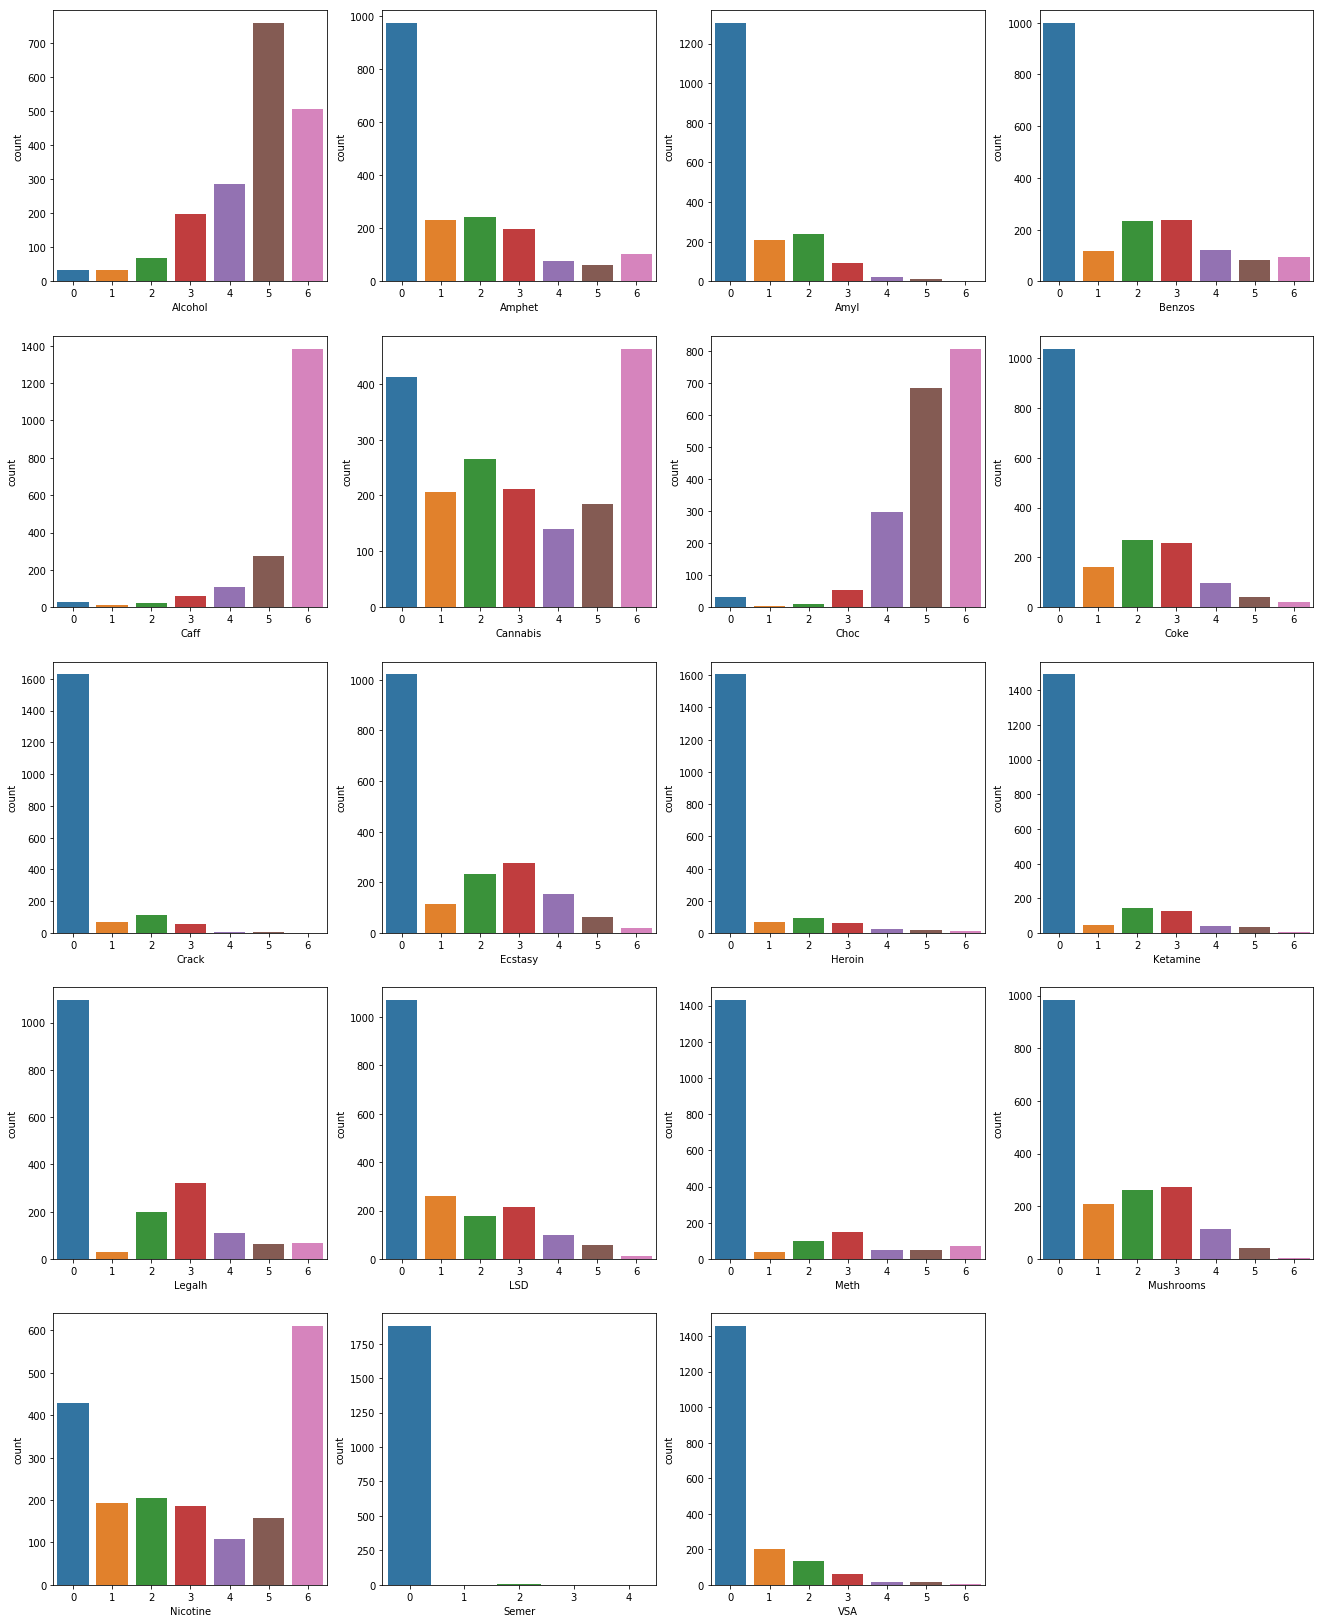

In [7]:
fig, axs = plt.subplots(nrows=6, ncols=3, figsize=(20, 25))
plt.subplots_adjust(right=1, top=1)

for _i, _column in enumerate(catColumns, 1):
    plt.subplot(5, 4, _i)
    sns.countplot(x=_column, data=data)
    
plt.show()    

Можно видеть разницу в распределениях для безвредных и легальных веществ типа кофеина, шоколада, алкоголя, никотина, а также препарата "Semer", в сравнении с более тяжелыми веществами. 

Указанные пять веществ предлагается исключить из дальнейшего рассмотрения:

In [8]:
removeColumns = ['Alcohol', 'Nicotine', 'Caff', 'Choc', 'Semer']
data.drop(removeColumns, axis=1, inplace=True)

Для признаков "Возраст", "Образование", "Этническая принадлежность", "Страна" построим гистограммы распределения кол-ва людей по соответствующим  группам в каждом из указанных признаков:

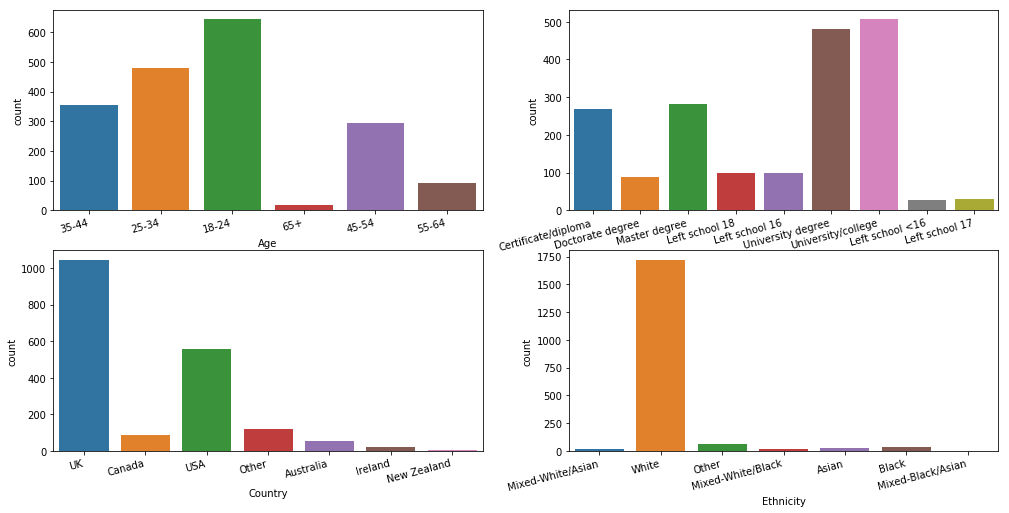

In [9]:
haracterColumns = ['Age', 'Education', 'Country', 'Ethnicity']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
plt.subplots_adjust(right=1, top=1)

for _i, _column in enumerate(haracterColumns, 1):
    plt.subplot(2, 2, _i)
    chart = sns.countplot(x=_column, data=data)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=15, horizontalalignment='right')
    
plt.show() 

Для признака "Country" такие страны как Канада, Австралия, Ирландия и Новая Зеландия можно объединить с остальными странами ("Other"), т.к. суммарное кол-во людей из этих стран невелико по сравнению с США и Великобританией: 

In [10]:
data['Country'].replace(['Canada', 'Australia', 'Ireland', 'New Zealand', 'Other'], 'Other', inplace=True)

теперь распределение по этому признаку будет иметь следующий вид:

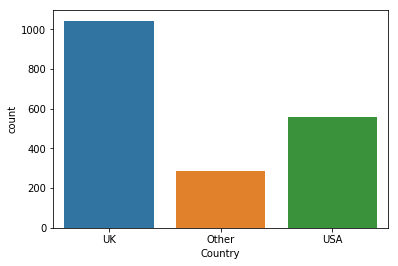

In [11]:
plt.figure()
sns.countplot(data=data, x='Country')
plt.xlabel('Country')
plt.show()

Аналогично, по этническому признаку можно выделить две категории: "White" и "Other"

In [12]:
data['Ethnicity'].replace(['Asian', 'Black', 'Mixed-Black/Asian', 'Mixed-White/Asian', 'Mixed-White/Black', 'Other'],
                           'Other', inplace=True)

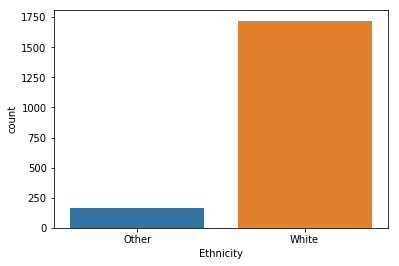

In [13]:
plt.figure()
sns.countplot(data=data, x='Ethnicity')
plt.xlabel('Ethnicity')
plt.show()

даже после этого объединения, большинство респондентов относятся к категории "White"

## Multilabel classification

В машинном обучении классификация с несколькими метками (multilabel) и тесно связанная с ней проблема классификации с несколькими выходами (multioutput) являются вариантами проблемы классификации, в которой каждому экземпляру может быть присвоено несколько меток. Классификация с несколькими метками - это обобщение многоклассовой классификации, которая представляет собой проблему с одной меткой для классификации экземпляров точно в один из более чем двух классов; в задаче с несколькими метками нет ограничений на количество классов, которым может быть назначен экземпляр.

Иными словами, классификация с несколькими метками - это проблема поиска модели, которая сопоставляет входные данные *X* двоичным векторам *y*, присваивая значение 0 или 1 для каждого элемента (метки) в *y*.

Предварительно создадим функции:

In [14]:
def getMultilabel(data, feature):
    """
        Создать многомерный вектор ответов

        Arguments:
            data, pandas.DataFrame: dataset with needed feature
            feature_name, str: feature to make multilabel

        Return:
            y, numpy.array: multilabel targets for each value in dataset
    """
    y = np.zeros((data.shape[0], 7))

    for i in range(data.shape[0]):
        value = data[feature].iloc[i]
        y[i, value] = 1

    return y

In [15]:
def getOneHotEncoding(data, columns):
    """
        Применить к входным данным метод one-hot encoding

        Arguments:
            data, pd.DataFrame: original data
            columns, list: columns to encoding

        Return:
            data, pd.DataFrame: data with encoded columns
    """
    for col in columns:
        data = pd.concat([data, pd.get_dummies(data[col], prefix=col)], axis=1)
  
    data.drop(columns, axis=1, inplace=True)

    return data

Создадим датасет входов *X*

К категориальным признакам (возраст, образование и т.п.) применим метод **one_hot_encoding**, т.е. для каждого создадим новые *k* признаков, где *k* - кол-во значений, которые может принимать исходный признак. При этом для каждо строки один из этих новых признаков будет равен 1, в то время как остальные *k-1* будут равны 0.

Числовые признаки ("Nscore", "Escore", и т.д.) масштабируем к нормальному распределению со средним 0 и стандартным отклонением 1. Для этого используем метод *StandardScaler()* из модуля *preprocessing* библиотеки *sklearn*

In [16]:
drugsList = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 
             'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'VSA']
haracterColumns.append('Gender')
numericColumns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']

X = data.drop(drugsList, axis=1)
X = getOneHotEncoding(X, haracterColumns)
X[numericColumns] = StandardScaler().fit_transform(X[numericColumns])

X.head()

,ID,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Age_18-24,Age_25-34,...,Education_Master degree,Education_University degree,Education_University/college,Country_Other,Country_UK,Country_USA,Ethnicity_Other,Ethnicity_White,Gender_Female,Gender_Male
0,1,0.337059,-0.528234,-0.571966,-0.911428,0.080816,1.303400,-1.192420,0,0,...,0,0,0,0,1,0,1,0,1,0
1,2,-0.757818,1.835144,1.404350,0.797602,-0.062764,0.678848,0.614215,0,1,...,0,0,0,0,1,0,0,1,0,1
2,3,-0.538842,0.801166,-0.876015,-1.688260,-1.067821,0.275492,1.130396,0,0,...,0,0,0,0,1,0,0,1,0,1
3,4,-0.210379,-0.823656,0.036131,0.642236,0.655134,0.275492,-1.192420,1,0,...,1,0,0,0,1,0,0,1,1,0
4,5,0.775010,-1.709922,-0.419942,-0.289962,1.229453,1.303400,0.614215,0,0,...,0,0,0,0,1,0,0,1,1,0


Для каждого вещества из *drugsList* cоздадим вектор (multilabel) выходов *y*, разделим исходные данные на тренировочную (train) и тестовую (test) выборки. Поскольку набор данных у нас совсем небольшой, для начала в тестовую выборку выделим 10%

Далее для каждого вещества создадим и обучим по 3 модели классификации: *дерево решений* (*DecisionTreeClassifier*), *случайный лес* (*RandomForestClassifier*) и *К ближайших соседей* (*KNeighborsClassifier*)

Для каждой модели рассчитаем *чувствительность* (*sensitivity*) - истинно положительная пропорция, т.е. доля положительных результатов, которые правильно идентифицированы, и *специфичность* (*specificity*) - истинно отрицательная пропорция, т.е. отражает долю отрицательных результатов, которые правильно идентифицированы 

$$sens = \frac{tp}{tp + fn}$$

$$spec = \frac{tn}{tn + fp}$$

где *tp*  = *true positive*, *fn* = *false negative*, *tn* = *true negative*, *fp* = *false negative*

In [17]:
sensList = []
specList = []

for _drug in drugsList:
    y = getMultilabel(data, _drug)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15)

    tree = DecisionTreeClassifier(random_state=17)
    rf = RandomForestClassifier(random_state=17)
    knn = KNeighborsClassifier()

    models = [tree, rf, knn]

    _sens = []
    _spec = []

    for model in models:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        _sensitivity = recall_score(y_test, preds, average='micro')
        _specificity = recall_score((y_test == 0).astype(int), (preds == 0).astype(int), average='micro')

        _sens.append(_sensitivity)
        _spec.append(_specificity)

    sensList.append(_sens)
    specList .append(_spec)

sensList = np.array(sensList)
specList = np.array(specList)

In [18]:
sensDict = {'Decision Tree': sensList[:, 0],
            'Random Forest': sensList[:, 1],
            'kNN': sensList[:, 2]}

multilabel_sens_res = pd.DataFrame(data=sensDict, index=drugsList)

specDict = {'Decision Tree': specList[:, 0],
            'Random Forest': specList[:, 1],
            'kNN': specList[:, 2]}

multilabel_spec_res = pd.DataFrame(data=specDict, index=drugsList)

In [19]:
multilabel_sens_res

,Decision Tree,Random Forest,kNN
Amphet,0.338624,0.285714,0.317460
Amyl,0.486772,0.523810,0.571429
Benzos,0.417989,0.349206,0.370370
Cannabis,0.275132,0.095238,0.116402
Coke,0.396825,0.317460,0.349206
Crack,0.714286,0.788360,0.820106
Ecstasy,0.412698,0.338624,0.365079
Heroin,0.746032,0.756614,0.814815
Ketamine,0.619048,0.671958,0.671958
Legalh,0.555556,0.455026,0.465608


In [20]:
multilabel_spec_res

,Decision Tree,Random Forest,kNN
Amphet,0.889771,0.969136,0.948854
Amyl,0.914462,0.963845,0.947090
Benzos,0.902998,0.974427,0.945326
Cannabis,0.879189,0.984127,0.945326
Coke,0.899471,0.968254,0.947972
Crack,0.952381,0.974427,0.976190
Ecstasy,0.902116,0.975309,0.947090
Heroin,0.957672,0.979718,0.975309
Ketamine,0.936508,0.970018,0.966490
Legalh,0.925926,0.979718,0.962963


как можем видеть, результаты, в большинстве случаев, не впечатляют! Вероятнее всего это связано с недостаточным набором данных для качественного обучения моделей. На самом послднем этапе предлагается провести более детальный анализ для какого-нибудь одного вещества, применив, в т.ч. кросс-валидацию. Пока что перейдем к бинарной классификации 

## Binary classification

Здесь по сути будем делать то же самое что и на предыдущем этапе. с той лишь разницей, семь целевых классов скомпонуем в два. Предлагается сделать это несколькими способами и посмотреть, для каких случаев метрики качества покажут наилучшие результаты

К уже имеющимся трем моделям обучения добавим к рассмотрению *логистическую регрессию* (*LogisticRegression*)

In [21]:
def plotCatHists(data, features):
    """
        Гистограммы распередления целевого признака по категориальным признакам

        Arguments:
            data, pandas.DataFrame: dataset for plotting
            features, list: features required for plotting
    """
    fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
    plt.subplots_adjust(right=1, top=1)

    for i, _feature in enumerate(features, 1):
        plt.subplot(4, 4, i)
        sns.countplot(x=_feature, data=data, hue=_feature)
        plt.legend(['Non-users', 'Users'])
        plt.xlabel(str(_feature))
        
    plt.show()

In [22]:
def calcModels(data, targets):
    """
        Создание и обучение моделей, вывод результатов (чувствительность, специфичность)

        Arguments:
            data, pandas.DataFrame: dataset for training
            targets, list: list of target features

        Return:
            results, list: lists of dataframes with results of training
    """
    haracterColumns = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
    numericColumns = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
    
    X = data.drop(targets, axis=1)
    X = getOneHotEncoding(X, haracterColumns)
    X[numericColumns] = StandardScaler().fit_transform(X[numericColumns])

    sensList = []
    specList = []

    for _target in targets:
        y = data[_target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

        tree = DecisionTreeClassifier(random_state=17)
        rf = RandomForestClassifier(random_state=17)
        knn = KNeighborsClassifier()
        lr = LogisticRegression(random_state=17)

        models = [tree, rf, knn, lr]

        _sens = []
        _spec = []

        for _model in models:
            _model.fit(X_train, y_train)
      
            _sensitivity = recall_score(y_test, _model.predict(X_test))
            _specificity = recall_score(y_test, _model.predict(X_test), pos_label=0)
      
            _sens.append(_sensitivity)
            _spec.append(_specificity)

        sensList.append(_sens)
        specList.append(_spec)

    sensList = np.array(sensList)
    specList = np.array(specList)
  
    sensDict = {'Decision Tree': sensList[:, 0],
                'Random Forest': sensList[:, 1],
                'kNN': sensList[:, 2],
                'Logistic Regression': sensList[:, 3]}

    multilabel_sens_res = pd.DataFrame(data=sensDict, index=targets)

    specDict = {'Decision Tree': specList[:, 0],
                'Random Forest': specList[:, 1],
                'kNN': specList[:, 2],
                'Logistic Regression': specList[:, 3]}

    multilabel_spec_res = pd.DataFrame(data=specDict, index=targets)

    results = [multilabel_sens_res, multilabel_spec_res]
    
    return results

#### 1. Декада (10 лет)

Категории "Never used" и "Used over a decade ago" объединяем в класс "Не употреблял", все остальные объединяются в класс "Употреблял". Иными словами, в этой выборке рассматриваем людей, которые употребляли сильные вещества хотя бы раз за последние 10 лет.  

In [23]:
data_decade = data.copy()
data_decade.replace([0, 1], 0, inplace=True)
data_decade.replace([2, 3, 4, 5, 6], 1, inplace=True)

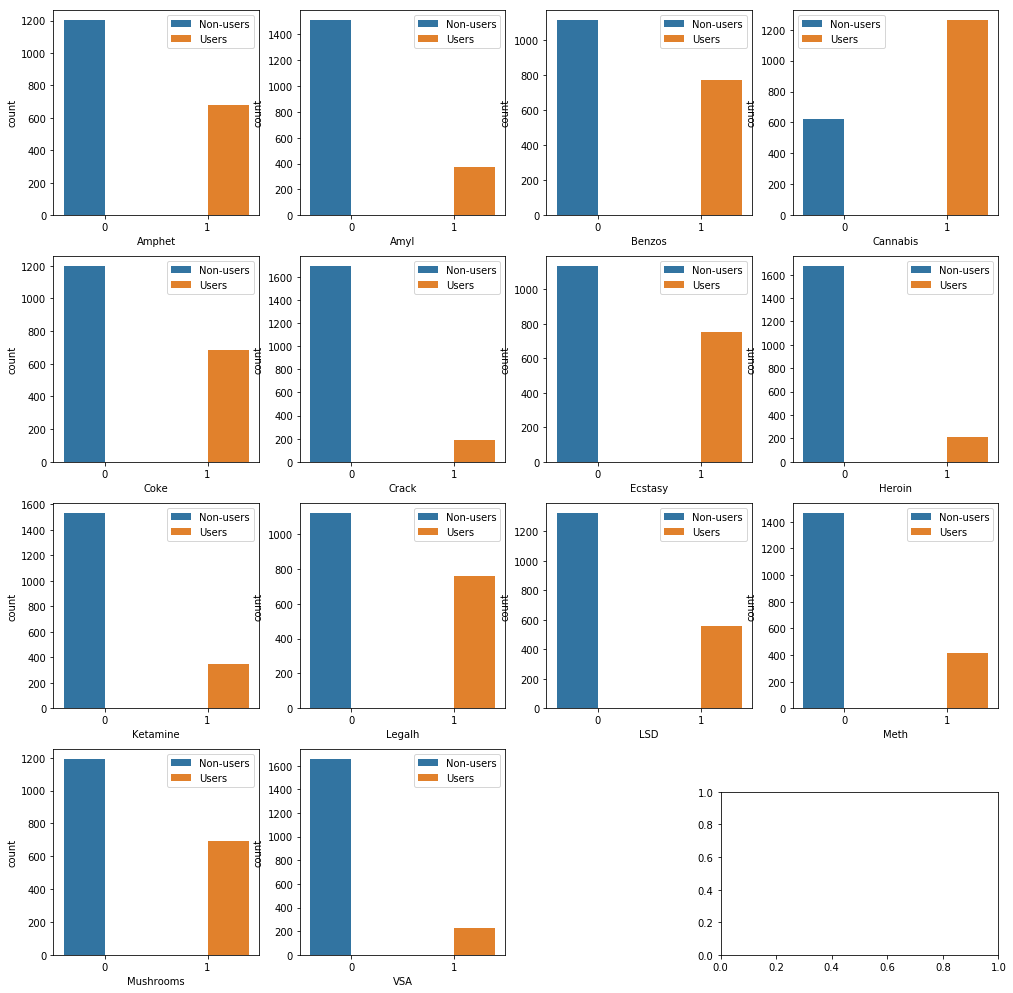

In [24]:
plotCatHists(data_decade, drugsList)

In [25]:
results_decade = calcModels(data_decade, drugsList)

In [26]:
# results by sensitivity
results_decade[0]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.414286,0.514286,0.614286,0.542857
Amyl,0.263158,0.157895,0.157895,0.078947
Benzos,0.453333,0.466667,0.560000,0.560000
Cannabis,0.800000,0.846154,0.861538,0.861538
Coke,0.373333,0.413333,0.440000,0.506667
Crack,0.320000,0.000000,0.000000,0.000000
Ecstasy,0.554217,0.566265,0.445783,0.602410
Heroin,0.263158,0.052632,0.000000,0.052632
Ketamine,0.292683,0.146341,0.097561,0.073171
Legalh,0.630952,0.678571,0.702381,0.702381


In [27]:
# results by specificity
results_decade[1]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.714286,0.823529,0.747899,0.798319
Amyl,0.807947,0.980132,0.940397,1.000000
Benzos,0.745614,0.850877,0.649123,0.780702
Cannabis,0.610169,0.711864,0.610169,0.677966
Coke,0.692982,0.859649,0.780702,0.842105
Crack,0.896341,1.000000,0.975610,1.000000
Ecstasy,0.660377,0.811321,0.716981,0.811321
Heroin,0.870588,0.988235,0.988235,0.994118
Ketamine,0.797297,0.979730,0.918919,0.979730
Legalh,0.790476,0.847619,0.752381,0.857143


#### 2. 1 год

"Used in last decade", "Used over a decade ago" и "Never used" -> "Non-users". Т.е. считаем употреблявшими тех, кто употреблял хоть раз за последний год

In [28]:
data_year = data.copy()
data_year.replace([0, 1, 2], 0, inplace=True)
data_year.replace([3, 4, 5, 6], 1, inplace=True)

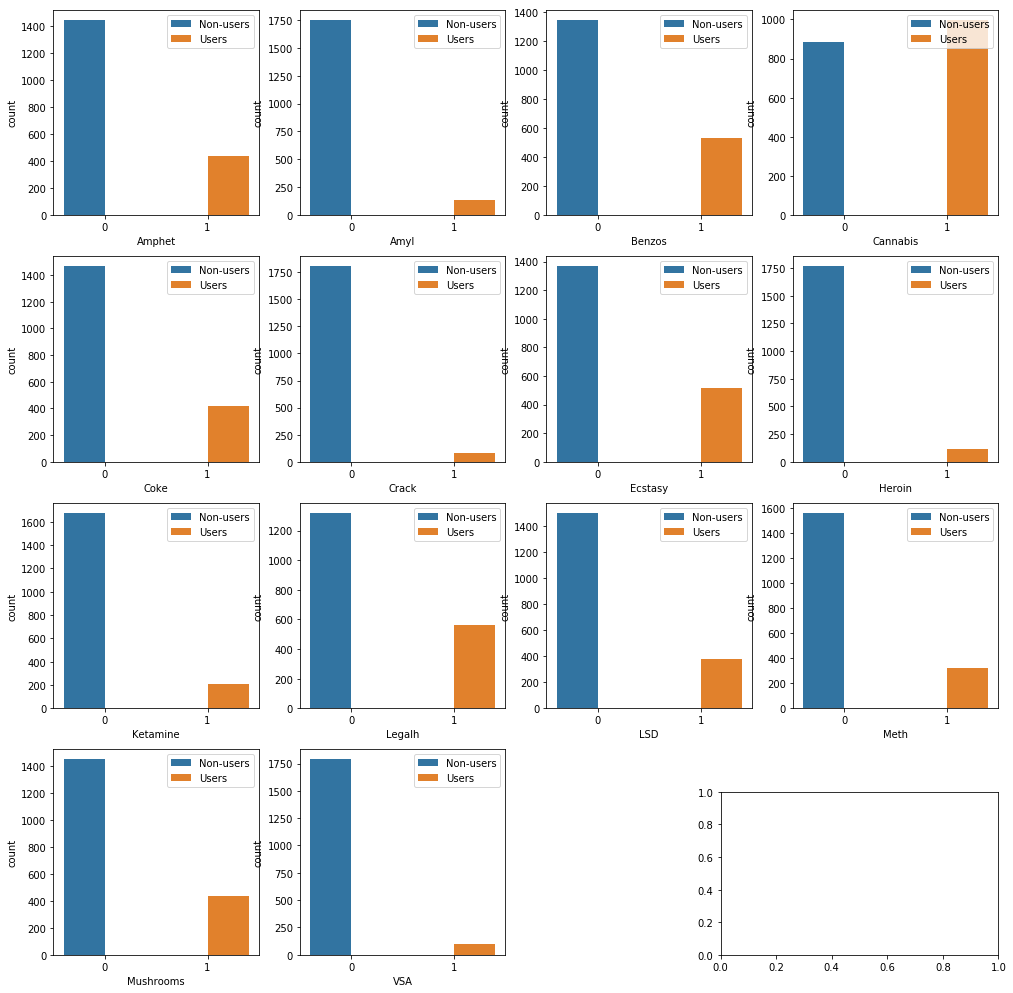

In [29]:
plotCatHists(data_year, drugsList)

In [30]:
results_year = calcModels(data_year, drugsList)

In [31]:
# results by sensitivity
results_year[0]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.500000,0.304348,0.369565,0.456522
Amyl,0.181818,0.000000,0.000000,0.000000
Benzos,0.442308,0.288462,0.346154,0.384615
Cannabis,0.696429,0.696429,0.812500,0.794643
Coke,0.346939,0.163265,0.163265,0.183673
Crack,0.066667,0.066667,0.000000,0.000000
Ecstasy,0.454545,0.309091,0.309091,0.490909
Heroin,0.125000,0.000000,0.000000,0.000000
Ketamine,0.173913,0.086957,0.000000,0.000000
Legalh,0.560606,0.439394,0.575758,0.530303


In [32]:
# results by specificity
results_year[1]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.860140,0.944056,0.881119,0.923077
Amyl,0.893258,1.000000,0.994382,1.000000
Benzos,0.839416,0.861314,0.810219,0.854015
Cannabis,0.792208,0.844156,0.688312,0.857143
Coke,0.707143,0.957143,0.871429,0.971429
Crack,0.913793,0.994253,1.000000,1.000000
Ecstasy,0.791045,0.888060,0.828358,0.880597
Heroin,0.917127,1.000000,0.994475,1.000000
Ketamine,0.873494,1.000000,0.993976,1.000000
Legalh,0.837398,0.902439,0.845528,0.910569


#### 3. Месяц

"Used in last year", "Used in last decade", "Used over a decade ago" и "Never used" -> "Non-users"

In [33]:
data_month = data.copy()
data_month.replace([0, 1, 2, 3], 0, inplace=True)
data_month.replace([4, 5, 6], 1, inplace=True)

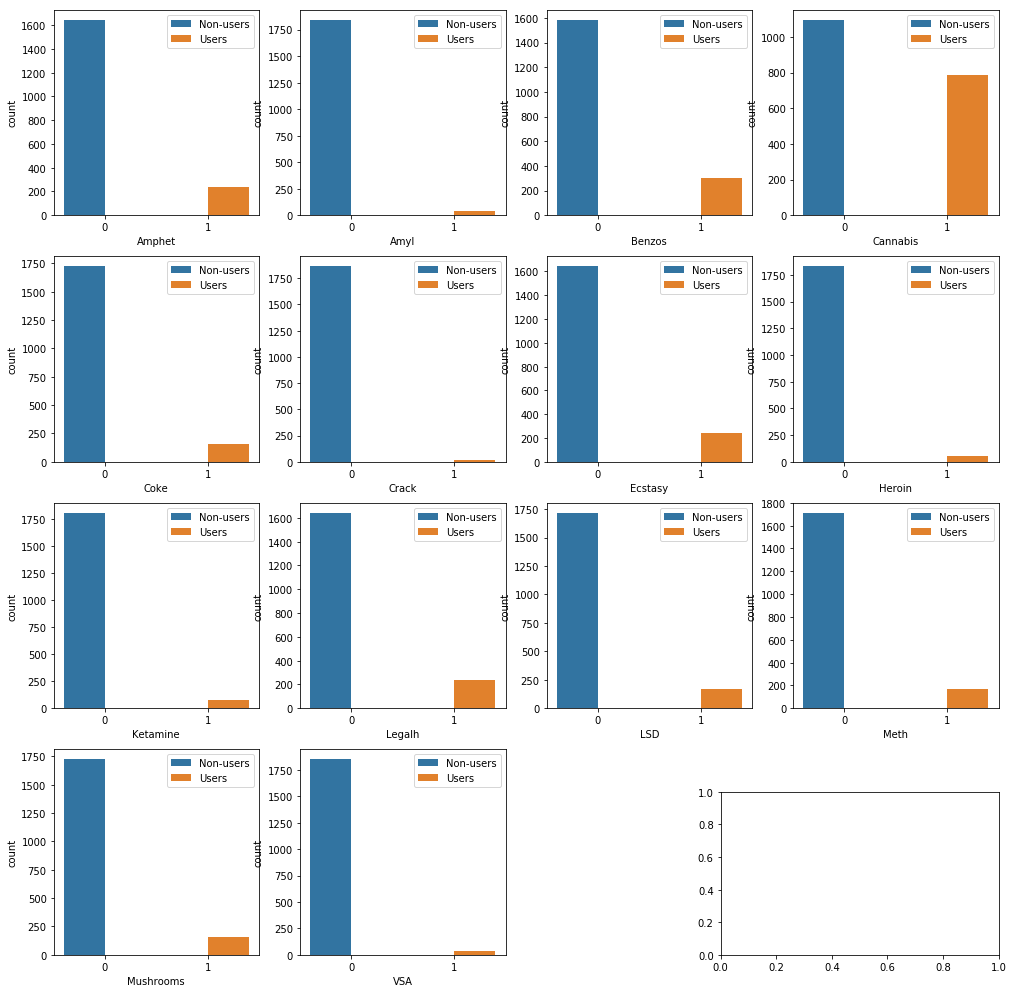

In [34]:
plotCatHists(data_month, drugsList)

In [35]:
results_month = calcModels(data_month, drugsList)

In [36]:
# results by sensitivity
results_month[0]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.222222,0.074074,0.185185,0.000000
Amyl,0.250000,0.000000,0.000000,0.000000
Benzos,0.269231,0.192308,0.076923,0.038462
Cannabis,0.555556,0.555556,0.616162,0.646465
Coke,0.190476,0.000000,0.000000,0.000000
Crack,0.000000,0.000000,0.000000,0.000000
Ecstasy,0.130435,0.086957,0.086957,0.000000
Heroin,0.000000,0.000000,0.000000,0.000000
Ketamine,0.333333,0.000000,0.000000,0.000000
Legalh,0.259259,0.111111,0.111111,0.037037


In [37]:
# results by specificity
results_month[1]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.907407,0.981481,0.975309,0.993827
Amyl,0.989189,1.000000,1.000000,1.000000
Benzos,0.871166,0.987730,0.944785,0.987730
Cannabis,0.777778,0.877778,0.733333,0.866667
Coke,0.904762,1.000000,0.994048,1.000000
Crack,0.978495,1.000000,1.000000,1.000000
Ecstasy,0.843373,0.987952,0.933735,0.993976
Heroin,0.957219,1.000000,1.000000,1.000000
Ketamine,0.945355,1.000000,1.000000,1.000000
Legalh,0.858025,0.987654,0.987654,1.000000


#### 4. Неделя

"Used in last week" и "Used in last month" -> "Users"

In [38]:
data_week = data.copy()
data_week.replace([0, 1, 2, 3, 6], 0, inplace=True)
data_week.replace([4, 5], 1, inplace=True)

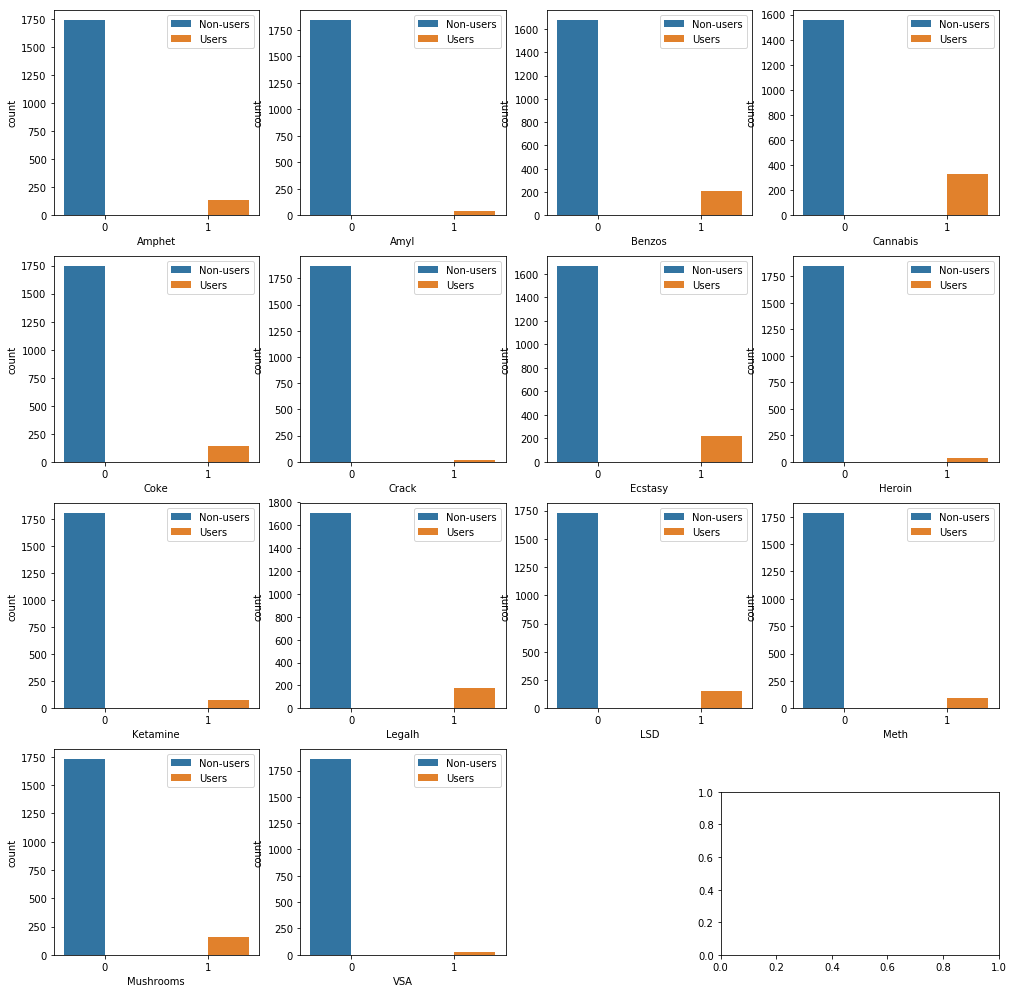

In [39]:
plotCatHists(data_week, drugsList)

In [40]:
results_week = calcModels(data_week, drugsList)

In [41]:
# results by sensitivity
results_week[0]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.416667,0.000000,0.000000,0.00000
Amyl,0.000000,0.000000,0.000000,0.00000
Benzos,0.300000,0.100000,0.000000,0.00000
Cannabis,0.285714,0.095238,0.119048,0.02381
Coke,0.142857,0.000000,0.000000,0.00000
Crack,0.000000,0.000000,0.000000,0.00000
Ecstasy,0.187500,0.187500,0.125000,0.00000
Heroin,0.000000,0.000000,0.000000,0.00000
Ketamine,0.000000,0.000000,0.000000,0.00000
Legalh,0.277778,0.000000,0.055556,0.00000


In [42]:
# results by specificity
results_week[1]

,Decision Tree,Random Forest,kNN,Logistic Regression
Amphet,0.920904,0.988701,0.994350,1.000000
Amyl,0.972973,1.000000,1.000000,1.000000
Benzos,0.869822,0.994083,0.958580,1.000000
Cannabis,0.809524,0.972789,0.938776,0.965986
Coke,0.904762,1.000000,0.994048,1.000000
Crack,0.989247,1.000000,1.000000,1.000000
Ecstasy,0.901734,0.994220,0.953757,1.000000
Heroin,0.962567,1.000000,1.000000,1.000000
Ketamine,0.951087,1.000000,1.000000,1.000000
Legalh,0.923977,1.000000,0.982456,1.000000


Можно видеть, что результаты от случая к случаю достаточно сильно отличаются. Для итогового детального рассмотрения предлагается выбрать одно из веществ, для которого результат по метрике *чувствительность* не сильно меняется от модели к модели и имеет достаточно высокое количественное значение. Временной интервал будем рассматривать 1 год, т.к. 10 лет достаточно долгий период, а для месяца и недели результаты получились совсем плохими. Учитывая вышесказанное, предлагается рассмотреть вещество "Ecstasy". 

## Binary classification для вещества "Ecstasy" с отнесением к употреблявшим, тех кто принимал в течении года

In [43]:
data_ecstasy = data.drop(drugsList, axis=1)
data_ecstasy['Ecstasy'] = data['Ecstasy']

data_ecstasy.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Ecstasy
0,1,35-44,Female,Certificate/diploma,UK,Other,39,36,42,37,42,355,132,0
1,2,25-34,Male,Doctorate degree,UK,White,29,52,55,48,41,307,223,4
2,3,35-44,Male,Certificate/diploma,UK,White,31,45,40,32,34,276,249,0
3,4,18-24,Female,Master degree,UK,White,34,34,46,47,46,276,132,0
4,5,35-44,Female,Doctorate degree,UK,White,43,28,43,41,50,355,223,1


In [44]:
data_ecstasy['Ecstasy'].replace([0, 1], 0, inplace=True)
data_ecstasy['Ecstasy'].replace([2, 3, 4, 5, 6], 1, inplace=True)

### Визуализация

Распределение употреблявших/неупотреблявших:

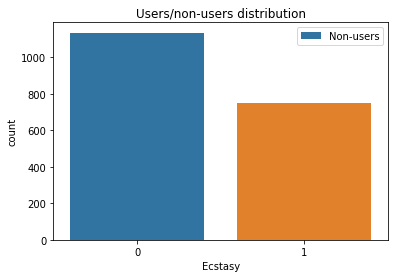

In [45]:
plt.figure()
sns.countplot(data=data_ecstasy, x='Ecstasy')
plt.title('Users/non-users distribution')
plt.legend(['Non-users', 'Users'])
plt.show()

Распределение употреблявших/неупотреблявших по возрастным группам:

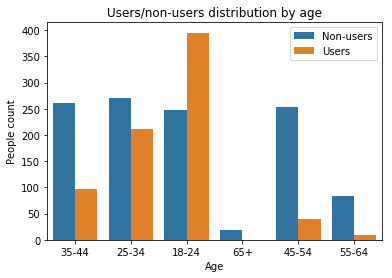

In [46]:
plt.figure()
sns.countplot(data=data_ecstasy, x='Age', hue='Ecstasy')
plt.title('Users/non-users distribution by age')
plt.ylabel('People count')
plt.legend(['Non-users', 'Users'])
plt.show()

Распределение употреблявших/неупотреблявших по полу:

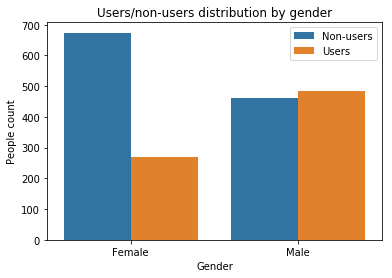

In [47]:
plt.figure()
sns.countplot(data=data_ecstasy, x='Gender', hue='Ecstasy')
plt.title('Users/non-users distribution by gender')
plt.ylabel('People count')
plt.legend(['Non-users', 'Users'])
plt.show()

Распределение употреблявших/неупотреблявших по уровню образования:

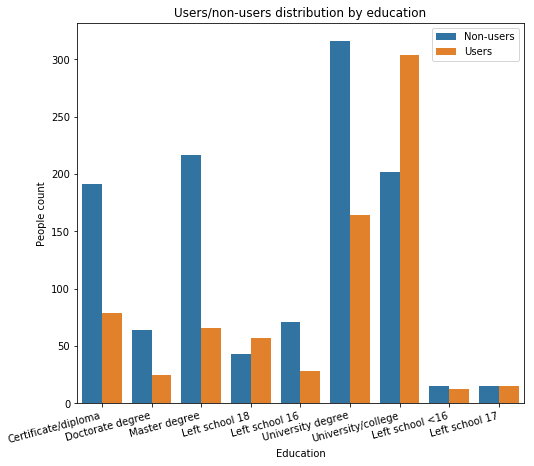

In [48]:
plt.figure(figsize=(8, 7))
chart = sns.countplot(data=data_ecstasy, x='Education', hue='Ecstasy')
chart.set_xticklabels(chart.get_xticklabels(), rotation=15, horizontalalignment='right')
plt.title('Users/non-users distribution by education')
plt.ylabel('People count')
plt.legend(['Non-users', 'Users'])
plt.show()

Распределение употреблявших/неупотреблявших по странам:

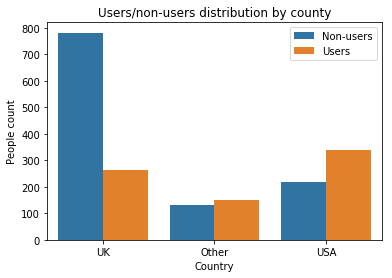

In [49]:
plt.figure()
sns.countplot(data=data_ecstasy, x='Country', hue='Ecstasy')
plt.title('Users/non-users distribution by county')
plt.ylabel('People count')
plt.legend(['Non-users', 'Users'])
plt.show()

Распределение употреблявших/неупотреблявших по этнической принадлежности:

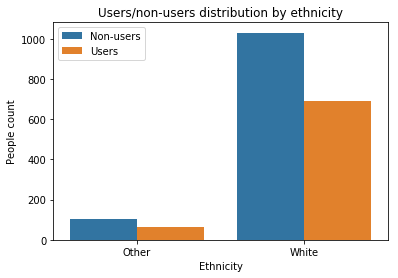

In [50]:
plt.figure()
chart = sns.countplot(data=data_ecstasy, x='Ethnicity', hue='Ecstasy')
plt.title('Users/non-users distribution by ethnicity')
plt.ylabel('People count')
plt.legend(['Non-users', 'Users'])
plt.show()

Промежуточные выводы:
    - среди молодых людей (18-24) больше всего потребителей вещества "Ecstasy". Также в этой возрастной группе потребляющих больше чем неупотребляющих;
    - употребляющих мужчин больше чем женщин;
    - доля употребляющих больше в группах с низким уровнем образования;
    - в США доля употребляющих гораздо выше чем в других странах
    - об этнической принадлежности сложно судить, т.к. большинство респондентов относится к категории "White"

Далее посмотрим на гистограммы распределения по медицинским и психологическим показателям (числовые признаки), какие интересные закономерности будут там

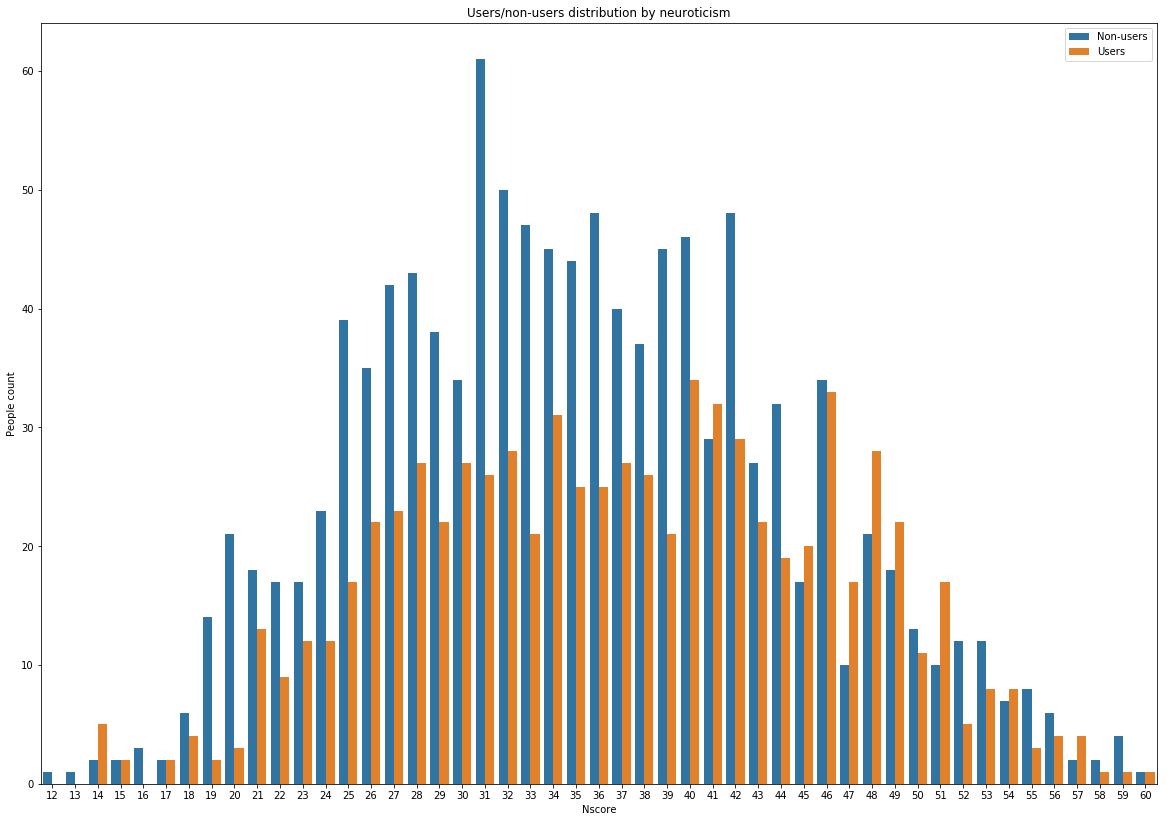

In [51]:
plt.figure(figsize=(20, 14))
sns.countplot(data=data_ecstasy, x='Nscore', hue='Ecstasy')
plt.title('Users/non-users distribution by neuroticism')
plt.legend(['Non-users', 'Users'])
plt.ylabel('People count')
plt.show()

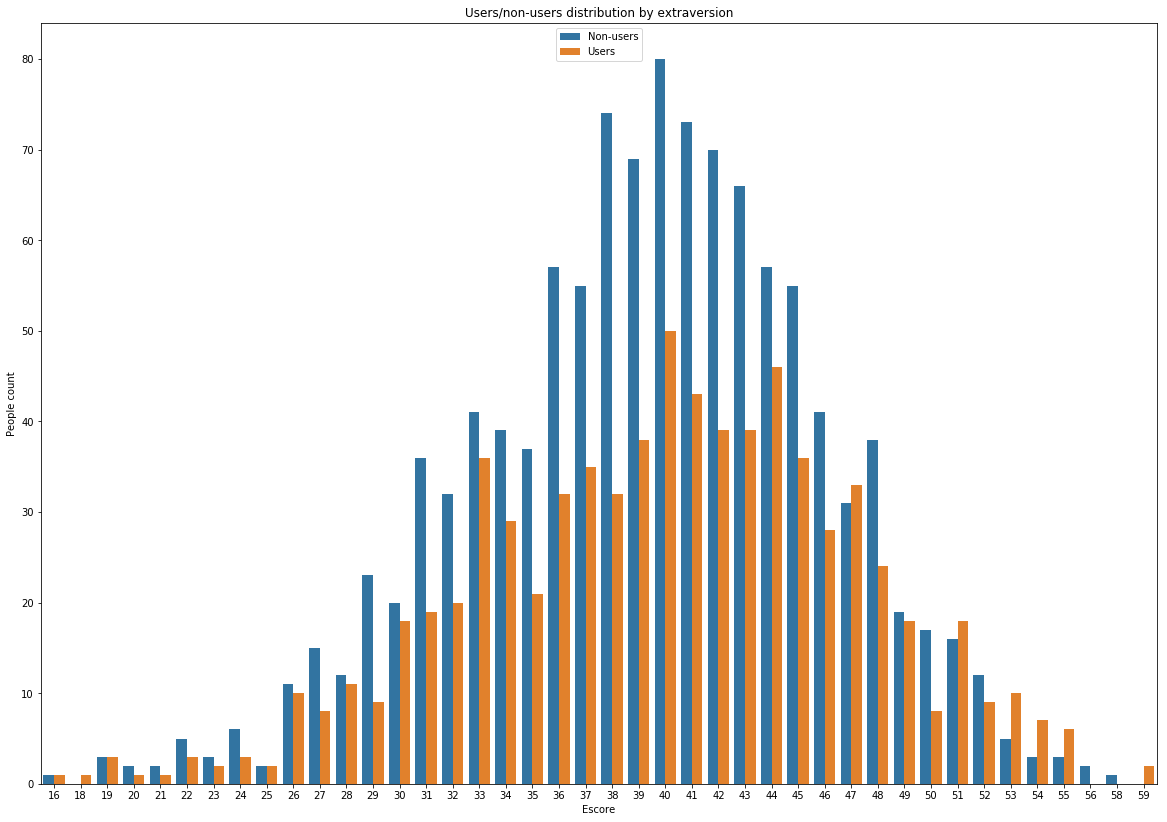

In [52]:
plt.figure(figsize=(20, 14))
sns.countplot(data=data_ecstasy, x='Escore', hue='Ecstasy')
plt.title('Users/non-users distribution by extraversion')
plt.legend(['Non-users', 'Users'])
plt.ylabel('People count')
plt.show()

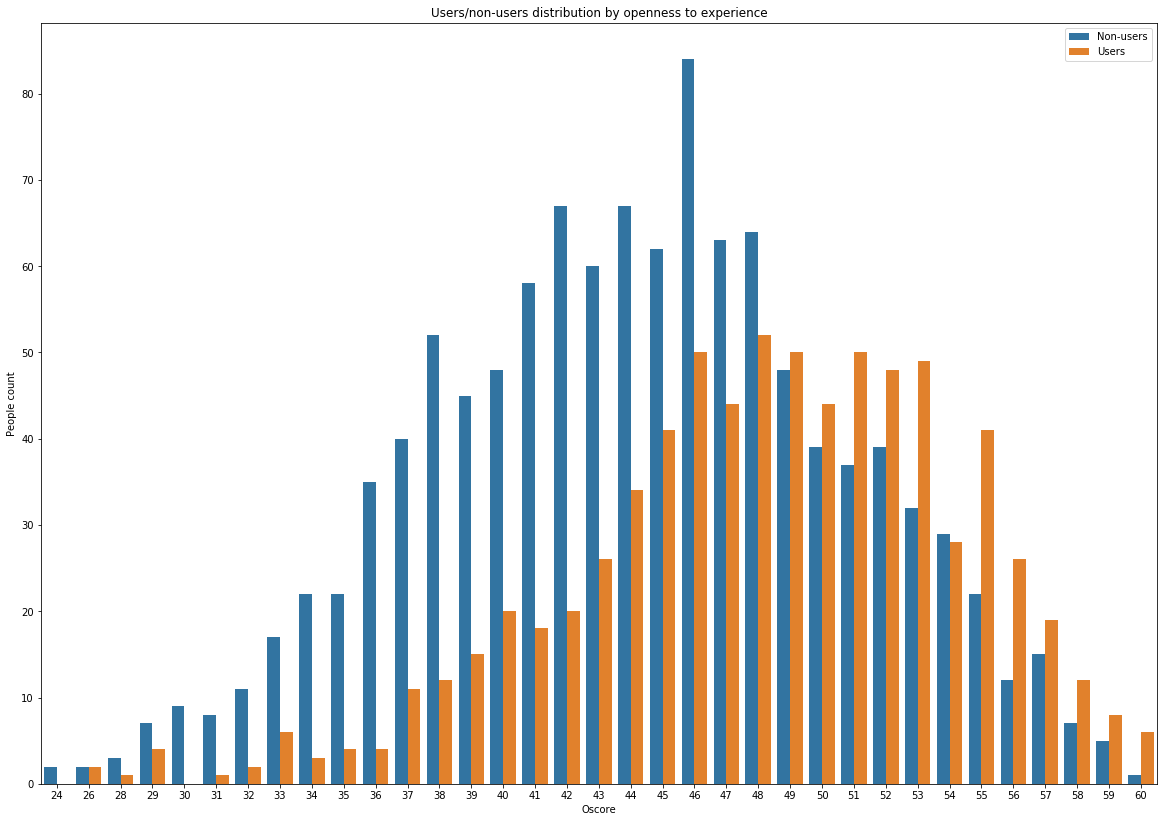

In [53]:
plt.figure(figsize=(20, 14))
sns.countplot(data=data_ecstasy, x='Oscore', hue='Ecstasy')
plt.title('Users/non-users distribution by openness to experience')
plt.legend(['Non-users', 'Users'])
plt.ylabel('People count')
plt.show()

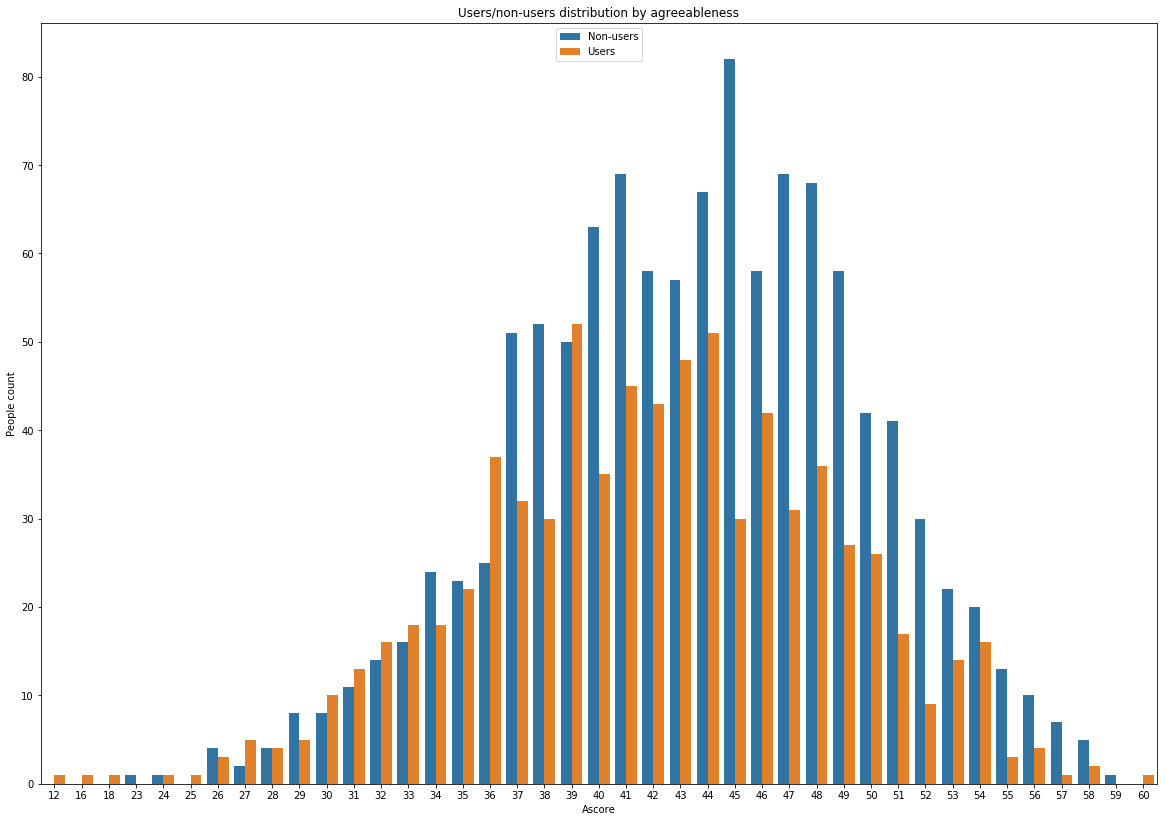

In [54]:
plt.figure(figsize=(20, 14))
sns.countplot(data=data_ecstasy, x='Ascore', hue='Ecstasy')
plt.title('Users/non-users distribution by agreeableness')
plt.legend(['Non-users', 'Users'])
plt.ylabel('People count')
plt.show()

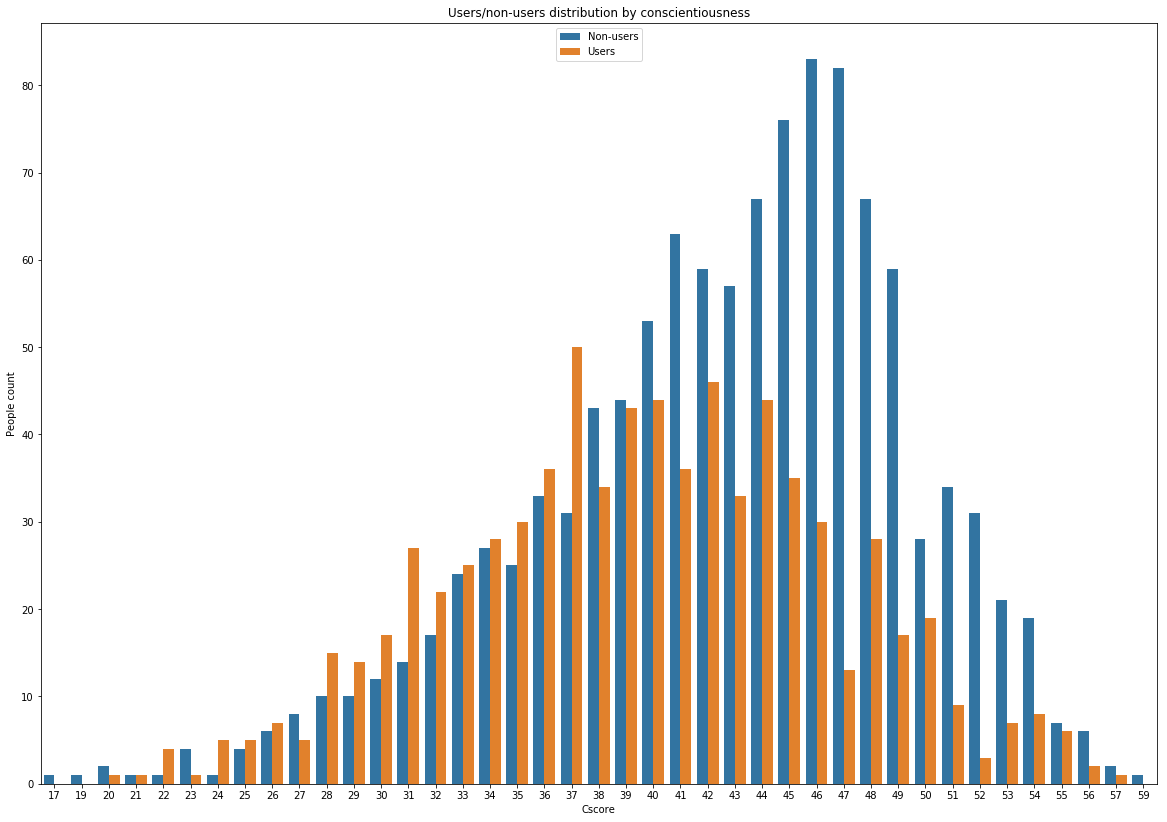

In [55]:
plt.figure(figsize=(20, 14))
sns.countplot(data=data_ecstasy, x='Cscore', hue='Ecstasy')
plt.title('Users/non-users distribution by conscientiousness')
plt.legend(['Non-users', 'Users'])
plt.ylabel('People count')
plt.show()

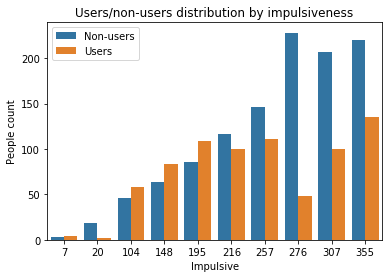

In [56]:
plt.figure()
sns.countplot(data=data_ecstasy, x='Impulsive', hue='Ecstasy')
plt.title('Users/non-users distribution by impulsiveness')
plt.legend(['Non-users', 'Users'])
plt.ylabel('People count')
plt.show()

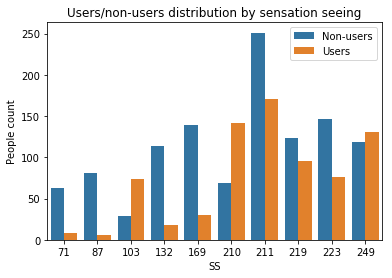

In [57]:
plt.figure()
sns.countplot(data=data_ecstasy, x='SS', hue='Ecstasy')
plt.title('Users/non-users distribution by sensation seeing')
plt.legend(['Non-users', 'Users'])
plt.ylabel('People count')
plt.show()

 - с ростом значения таких показателей как "Nscore" (neuroticism - невротизм), "Escore" (extraversion - экстраверсия) и "Oscore" (openness to experience - открытость опыту), доля употреблявших растет;
 - для показателей "Ascore" (agreeableness - приятность), "Cscore" (conscientiousness - добросовестность), доля. напротив, падает;
 - также доля употреблявших падает с ростом импульсивности ("Impulsive");
 - доля растет с ростом показателя "SS" (sensation seeing - поиск новых ощущений)

Приведенные выше результаты выглядят достаточно логично!

### Построение моделей

будем использовать те же четыре модели, что и ранее: *decision tree, random forest, kNN* и *logistic regression*

In [58]:
# Формируем набор входных признаков:
X = data_ecstasy.drop('Ecstasy', axis=1)
X = getOneHotEncoding(X, haracterColumns)
X[numericColumns] = StandardScaler().fit_transform(X[numericColumns])

# Целевой признак:
y = data_ecstasy['Ecstasy']

# Разбиваем на train и test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

# Модели
tree = DecisionTreeClassifier(random_state=17)
rf = RandomForestClassifier(random_state=17)
knn = KNeighborsClassifier()
lr = LogisticRegression(random_state=17)

modelsList = [tree, rf, knn, lr]

# Обучаем все модели на тренировочном сете (train)
# для каждой модели выведем метрики чувствительность (sens) и специфичность (spec) для тестовой выборки
tree.fit(X_train, y_train)
tree_sens = recall_score(y_test, tree.predict(X_test))
tree_spec = recall_score(y_test, tree.predict(X_test), pos_label=0)

rf.fit(X_train, y_train)
rf_sens = recall_score(y_test, rf.predict(X_test))
rf_spec = recall_score(y_test, rf.predict(X_test), pos_label=0)

knn.fit(X_train, y_train)
knn_sens = recall_score(y_test, knn.predict(X_test))
knn_spec = recall_score(y_test, knn.predict(X_test), pos_label=0)

lr.fit(X_train, y_train)
lr_sens = recall_score(y_test, lr.predict(X_test))
lr_spec = recall_score(y_test, lr.predict(X_test), pos_label=0)

# Результаты
print('DecisionTreeClassifier - sens: {0}; spec: {1}'.format(tree_sens, tree_spec))
print('RandomForestClassifier - sens: {0}; spec: {1}'.format(rf_sens, rf_spec))
print('KNeighborsClassifier - sens: {0}; spec: {1}'.format(knn_sens, knn_spec))
print('LogisticRegression - sens: {0}; spec: {1}'.format(lr_sens, lr_spec))

DecisionTreeClassifier - sens: 0.5783132530120482; spec: 0.660377358490566
RandomForestClassifier - sens: 0.5180722891566265; spec: 0.8207547169811321
KNeighborsClassifier - sens: 0.4457831325301205; spec: 0.7169811320754716
LogisticRegression - sens: 0.6024096385542169; spec: 0.8113207547169812


Качество по-прежнему плохое, попробуем применить кросс-валидацию и поиск по сетке (GridSearchCV) для поиска оптимальных параметров модели

### Cross-validation

будем использовать разделение "без перекрытия" *KFolds* (т.е. test и train в каждом случае будет разделены):

In [59]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

для каждой из четырех моделей будем искать оптимальные параметры по заданной сетке с помощью метода *GridSearchCV*, и смотреть на получившиеся результаты

#### decision tree:

In [60]:
# задаем сетку:
param_grid_tree = {'max_depth': list(range(2, 13, 2)),
                   'min_samples_split': list(range(2, 9, 2)),
                   'min_samples_leaf': list(range(1, 9, 2)),
                   'max_features': ['auto', 'sqrt', 'log2']}

# создаем модель с лучшими параметрами по сетке с заданными ранее параметрами кросс-валидации (*skf*):
tree_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=17), 
                         param_grid=param_grid_tree,
                         n_jobs=-1,
                         cv=skf)

# обучаем модель
tree_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6, 8, 10, 12], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
# лучшие найденные параметры
tree_grid.best_params_

{'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [62]:
# метрики
print('sens: ' + str(recall_score(y_test, tree_grid.best_estimator_.predict(X_test))))
print('spec: ' + str(recall_score(y_test, tree_grid.best_estimator_.predict(X_test), pos_label=0)))

sens: 0.5060240963855421
spec: 0.7075471698113207


In [78]:
# вероятности принадлежности целевого признака к каждому из двух классов
tree_grid.best_estimator_.predict_proba(X_test)

array([[0.52941176, 0.47058824],
       [1.        , 0.        ],
       [0.8       , 0.2       ],
       [0.32954545, 0.67045455],
       [0.13043478, 0.86956522],
       [0.98255814, 0.01744186],
       [0.81818182, 0.18181818],
       [0.1       , 0.9       ],
       [0.98924731, 0.01075269],
       [0.        , 1.        ],
       [0.8       , 0.2       ],
       [0.98924731, 0.01075269],
       [1.        , 0.        ],
       [0.98255814, 0.01744186],
       [0.78571429, 0.21428571],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.78571429, 0.21428571],
       [0.85714286, 0.14285714],
       [0.98255814, 0.01744186],
       [0.13043478, 0.86956522],
       [1.        , 0.        ],
       [0.46666667, 0.53333333],
       [0.975     , 0.025     ],
       [0.31034483, 0.68965517],
       [0.15151515, 0.84848485],
       [0.98255814, 0.01744186],
       [0.19047619, 0.80952381],
       [0.54285714, 0.45714286],
       [0.19047619, 0.80952381],
       [0.

####  random forest

In [63]:
# задаем сетку:
param_grid_rf = {'n_estimators': list(range(1, 102, 5)),
                 'max_depth': list(range(2, 13, 2)),
                 'min_samples_split': list(range(2, 9, 2)),
                 'min_samples_leaf': list(range(1, 9, 2)),
                 'max_features': ['auto', 'sqrt', 'log2']}

# создаем модель с лучшими параметрами по сетке с заданными ранее параметрами кросс-валидации (*skf*):
rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=17), 
                       param_grid=param_grid_rf,
                       n_jobs=-1,
                       cv=skf)

# обучаем модель
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=17, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101], 'max_depth': [2, 4, 6, 8, 10, 12], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 3, 5, 7], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [64]:
# лучшие найденные параметры
rf_grid.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 56}

In [65]:
# метрики
print('sens: ' + str(recall_score(y_test, rf_grid.best_estimator_.predict(X_test))))
print('spec: ' + str(recall_score(y_test, rf_grid.best_estimator_.predict(X_test), pos_label=0)))

sens: 0.6144578313253012
spec: 0.7924528301886793


In [76]:
# вероятности принадлежности целевого признака к каждому из двух классов
rf_grid.best_estimator_.predict_proba(X_test)

array([[0.55550051, 0.44449949],
       [0.52924174, 0.47075826],
       [0.65151432, 0.34848568],
       [0.45808176, 0.54191824],
       [0.27010717, 0.72989283],
       [0.92659215, 0.07340785],
       [0.88983937, 0.11016063],
       [0.44546161, 0.55453839],
       [0.93794586, 0.06205414],
       [0.28934374, 0.71065626],
       [0.78807   , 0.21193   ],
       [0.79270746, 0.20729254],
       [0.67502659, 0.32497341],
       [0.90737552, 0.09262448],
       [0.89054904, 0.10945096],
       [0.39402381, 0.60597619],
       [0.65574162, 0.34425838],
       [0.83984391, 0.16015609],
       [0.48867569, 0.51132431],
       [0.8441089 , 0.1558911 ],
       [0.22801936, 0.77198064],
       [0.53232038, 0.46767962],
       [0.59828323, 0.40171677],
       [0.85264983, 0.14735017],
       [0.63128185, 0.36871815],
       [0.33835423, 0.66164577],
       [0.80657938, 0.19342062],
       [0.24577375, 0.75422625],
       [0.56461869, 0.43538131],
       [0.29212456, 0.70787544],
       [0.

#### kNN

In [66]:
# задаем сетку:
param_grid_knn = {'n_neighbors': list(range(1, 50, 2)),
                  'weights': ['uniform', 'distance'],
                  'metric': ['euclidean', 'manhattan', 'minkowski']}

# создаем модель с лучшими параметрами по сетке с заданными ранее параметрами кросс-валидации (*skf*):
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(), 
                        param_grid=param_grid_knn,
                        n_jobs=-1,
                        cv=skf)

# обучаем модель
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
# лучшие найденные параметры
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [68]:
# метрики
print('sens: ' + str(recall_score(y_test, knn_grid.best_estimator_.predict(X_test))))
print('spec: ' + str(recall_score(y_test, knn_grid.best_estimator_.predict(X_test), pos_label=0)))

sens: 0.5662650602409639
spec: 0.7452830188679245


In [77]:
# вероятности принадлежности целевого признака к каждому из двух классов
knn_grid.best_estimator_.predict_proba(X_test)

array([[0.26315789, 0.73684211],
       [0.26315789, 0.73684211],
       [0.31578947, 0.68421053],
       [0.47368421, 0.52631579],
       [0.36842105, 0.63157895],
       [0.94736842, 0.05263158],
       [0.94736842, 0.05263158],
       [0.10526316, 0.89473684],
       [0.94736842, 0.05263158],
       [0.47368421, 0.52631579],
       [0.78947368, 0.21052632],
       [0.68421053, 0.31578947],
       [0.84210526, 0.15789474],
       [0.78947368, 0.21052632],
       [0.78947368, 0.21052632],
       [0.36842105, 0.63157895],
       [0.52631579, 0.47368421],
       [0.89473684, 0.10526316],
       [0.89473684, 0.10526316],
       [0.73684211, 0.26315789],
       [0.36842105, 0.63157895],
       [0.36842105, 0.63157895],
       [0.47368421, 0.52631579],
       [0.57894737, 0.42105263],
       [0.52631579, 0.47368421],
       [0.42105263, 0.57894737],
       [0.94736842, 0.05263158],
       [0.52631579, 0.47368421],
       [0.52631579, 0.47368421],
       [0.78947368, 0.21052632],
       [0.

#### Logistic regresion

In [69]:
lrcv = LogisticRegressionCV(Cs=np.logspace(-4, 4, num=20), cv=skf, max_iter=10000, random_state=17, n_jobs=-1)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04]),
           class_weight=None,
           cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=10000, multi_class='ovr', n_jobs=-1, penalty='l2',
           random_state=17, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [71]:
# метрики
print('sens: ' + str(recall_score(y_test, lrcv.predict(X_test))))
print('spec: ' + str(recall_score(y_test, lrcv.predict(X_test), pos_label=0)))

sens: 0.5783132530120482
spec: 0.8113207547169812


In [74]:
# вероятности принадлежности целевого признака к каждому из двух классов
lrcv.predict_proba(X_test)

array([[0.70945453, 0.29054547],
       [0.65095626, 0.34904374],
       [0.71047044, 0.28952956],
       [0.33113591, 0.66886409],
       [0.24346979, 0.75653021],
       [0.81764609, 0.18235391],
       [0.92938159, 0.07061841],
       [0.20970903, 0.79029097],
       [0.90092222, 0.09907778],
       [0.46598101, 0.53401899],
       [0.62731537, 0.37268463],
       [0.9441748 , 0.0558252 ],
       [0.69378421, 0.30621579],
       [0.7870135 , 0.2129865 ],
       [0.89450568, 0.10549432],
       [0.26934496, 0.73065504],
       [0.76144053, 0.23855947],
       [0.90611224, 0.09388776],
       [0.595524  , 0.404476  ],
       [0.63685323, 0.36314677],
       [0.11680425, 0.88319575],
       [0.60013717, 0.39986283],
       [0.58614497, 0.41385503],
       [0.91084433, 0.08915567],
       [0.58635273, 0.41364727],
       [0.36069138, 0.63930862],
       [0.84860403, 0.15139597],
       [0.1986805 , 0.8013195 ],
       [0.55018717, 0.44981283],
       [0.30674554, 0.69325446],
       [0.

Применение кросс-валидации практически не отразилось на качестве обучения для всех моделей. По всей видимости, подтверждается теория о недостаточном размере выборки. Вероятнее всего подобная картина будет при аналогичном детальном рассмотрении других веществ. Необходимо больше данных для качественного обучения!